In [13]:
import sys
sys.path.append('../')
import helper

import numpy as np

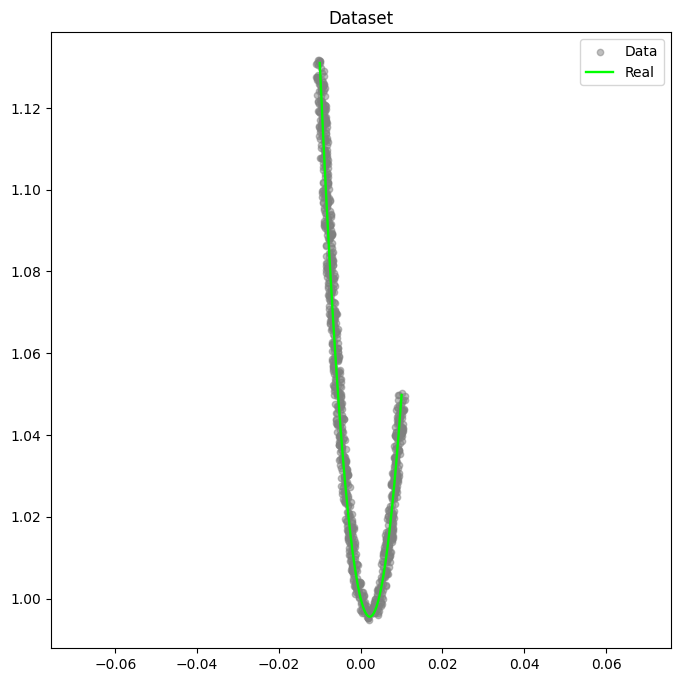

In [14]:
import torch

dataset_name = '1'
dataset_params = helper.get_params_dataset(dataset_name)
dataset_filename = helper.get_filenames_datasets()[dataset_name]
f = helper.get_func_research(dataset_params['f_label'])

X, Y, datasets = helper.load_datasets(dataset_filename)

helper.print_generated(X, Y, datasets[0], title="Dataset")

real_w = np.array([dataset_params["w0"], dataset_params["w1"]], dtype=float)

x_train, y_train = torch.from_numpy(datasets[0][:, :-1]), torch.from_numpy(datasets[0][:, -1:])

eps_minimum = helper.mse_loss_torch(x_train, y_train, torch.from_numpy(real_w), f)
eps_minimum = eps_minimum*1.1

initial_w = np.array([-1.0, 0.1])

Real w: [2. 3.]
Обученные значения w: [1.80948705 2.98686657] steps: 510


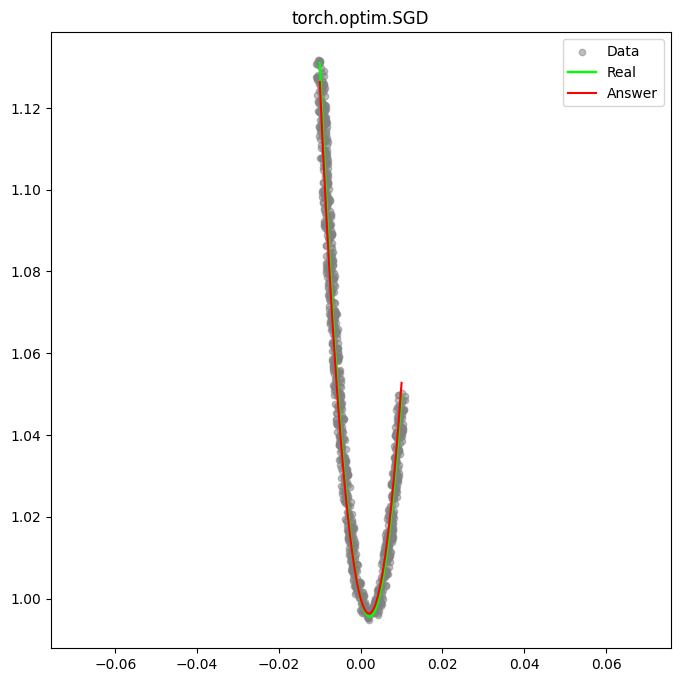

In [15]:
points = helper.train_torch_optim(f, x_train, y_train, eps_minimum, initial_w, helper.mse_loss_torch, torch.optim.SGD, lr=10)
print(f'Real w: {real_w}')
print("Обученные значения w:", points[-1], "steps:", len(points))
helper.print_generated(X, Y, datasets[0], f(X, points[-1]), title="torch.optim.SGD")

Real w: [2. 3.]
Обученные значения w: [1.80974792 2.99125042] steps: 569


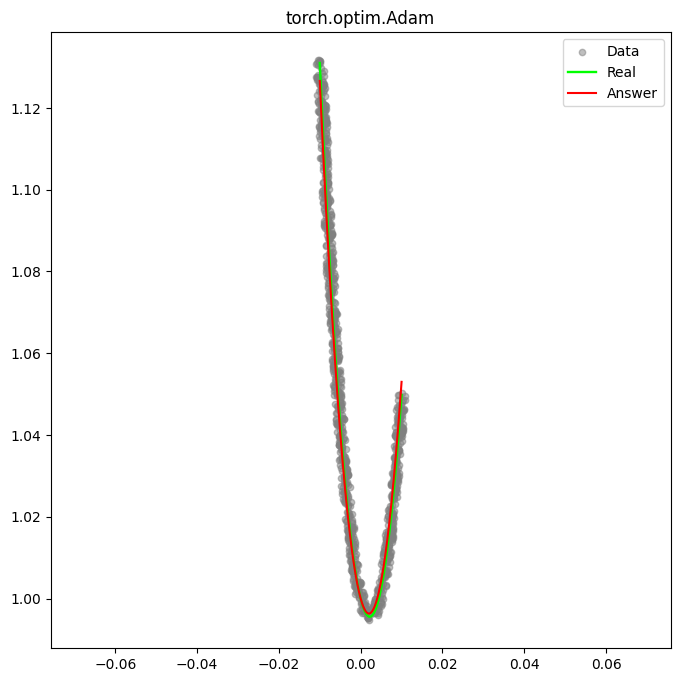

In [16]:
points = helper.train_torch_optim(f, x_train, y_train, eps_minimum, initial_w, helper.mse_loss_torch, torch.optim.Adam)
print(f'Real w: {real_w}')
print("Обученные значения w:", points[-1], "steps:", len(points))
helper.print_generated(X, Y, datasets[0], f(X, points[-1]), title="torch.optim.Adam")

Real w: [2. 3.]
Обученные значения w: [1.81156418 2.99187932] steps: 327


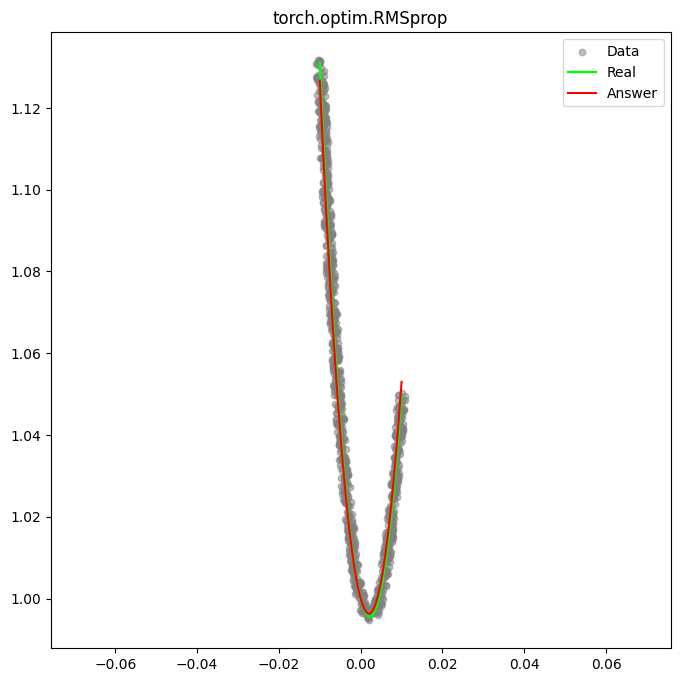

In [17]:
points = helper.train_torch_optim(f, x_train, y_train, eps_minimum, initial_w, helper.mse_loss_torch, torch.optim.RMSprop)
print(f'Real w: {real_w}')
print("Обученные значения w:", points[-1], "steps:", len(points))
helper.print_generated(X, Y, datasets[0], f(X, points[-1]), title="torch.optim.RMSprop")

Real w: [2. 3.]
Обученные значения w: [1.80948705 2.98686657] steps: 510


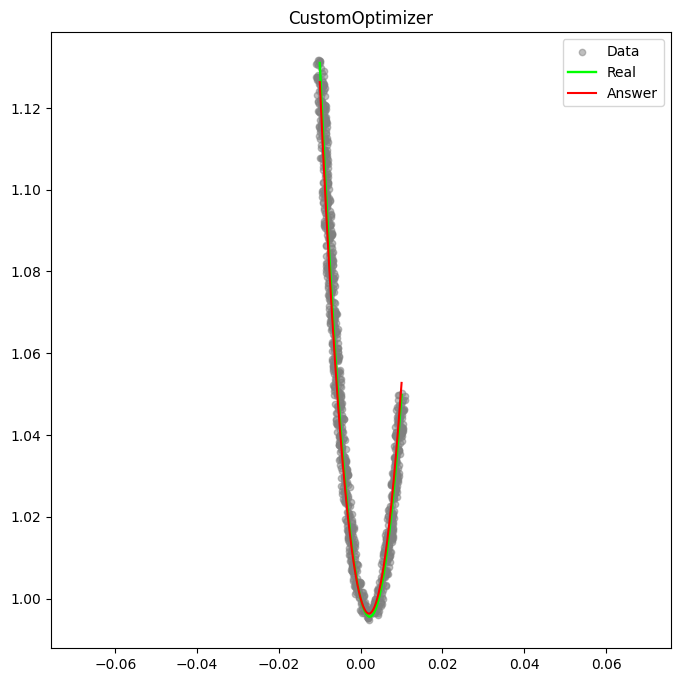

In [18]:
points = helper.train_torch_optim(f, x_train, y_train, eps_minimum, initial_w, helper.mse_loss_torch, helper.CustomOptimizer, lr=10)
print(f'Real w: {real_w}')
print("Обученные значения w:", points[-1], "steps:", len(points))
helper.print_generated(X, Y, datasets[0], f(X, points[-1]), title="CustomOptimizer")